**Task 4(a): Take grayscale image of size 512x512, add some Gaussian Noise & apply 4th order Butterworth and Gaussian Low Pass Filter to analyze their performance quantitatively**

### Importing the Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Function for Butterworth Low Pass Filter

In [2]:
def apply_butterworth_filter(image, order, cutoff_frequency):
    height, width = image.shape
    butterworth_filter = np.zeros((height, width), dtype = np.float32)

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height / 2)**2 + (v - width / 2)**2)
            butterworth_filter[u, v] = 1 / (1 + (D / cutoff_frequency)**(2 * order))

    filtered_image = image * butterworth_filter
    return np.fft.ifft2(np.fft.ifftshift(filtered_image)).real

### Function for Gaussian Low Pass Filter

In [3]:
def apply_gaussian_filter(image, cutoff_freq):
    height, width = image.shape
    gaussian_filter = np.zeros((height, width), dtype = np.float32)

    for u in range(height):
        for v in range(width):
            D = np.sqrt((u - height / 2)**2 + (v - width / 2)**2)
            gaussian_filter[u, v] = np.exp(-(D**2) / (2 * (cutoff_freq**2)))

    filtered_image = image * gaussian_filter
    return np.fft.ifft2(np.fft.ifftshift(filtered_image)).real

### Loading the Image

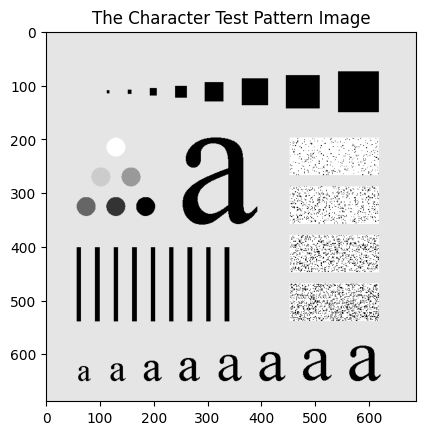

In [4]:
character_pattern_image = cv2.imread("./Images/Fig0445(a) Characters Test Pattern 688x688.tif", 0)
plt.imshow(cv2.cvtColor(character_pattern_image, cv2.COLOR_BGR2RGB))
plt.title("The Character Test Pattern Image")
plt.show()

### Adding Gaussian Noise

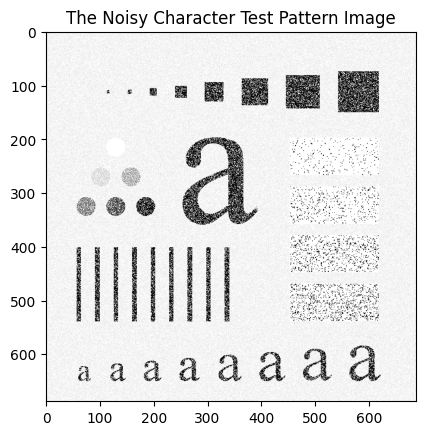

In [5]:
gaussian_noise = np.random.normal(7, 13, character_pattern_image.shape).astype(np.uint8)
noisy_character_pattern = cv2.add(character_pattern_image, gaussian_noise)
plt.imshow(cv2.cvtColor(noisy_character_pattern, cv2.COLOR_BGR2RGB))
plt.title("The Noisy Character Test Pattern Image")
plt.show()

### Applying FFT (Fast Fourier Transform)

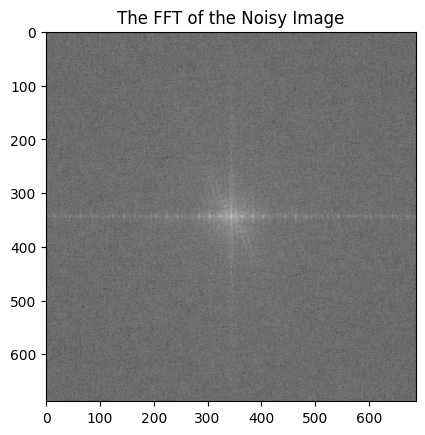

In [6]:
noisy_image_fft = np.fft.fftshift(np.fft.fft2(noisy_character_pattern))
plt.imshow(np.log(np.abs(noisy_image_fft)), cmap = "gray")
plt.title("The FFT of the Noisy Image")
plt.show()

### Applying Butterworth Filter

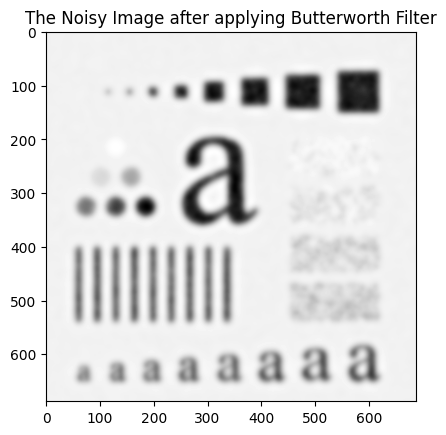

In [7]:
butterworth_filtered_image = apply_butterworth_filter(noisy_image_fft, 2, 25)
plt.imshow(butterworth_filtered_image, cmap = "gray")
plt.title("The Noisy Image after applying Butterworth Filter")
plt.show()

### Applying Gaussian Low Pass Filter

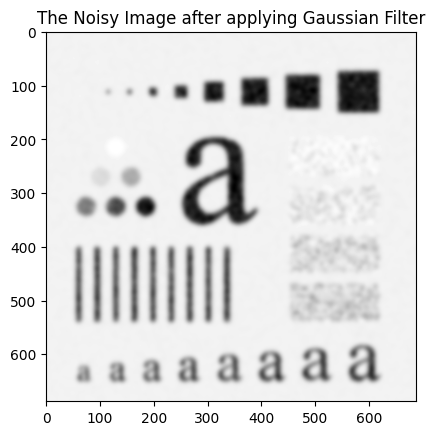

In [8]:
gaussian_filtered_image = apply_gaussian_filter(noisy_image_fft, 25)
plt.imshow(gaussian_filtered_image, cmap = "gray")
plt.title("The Noisy Image after applying Gaussian Filter")
plt.show()